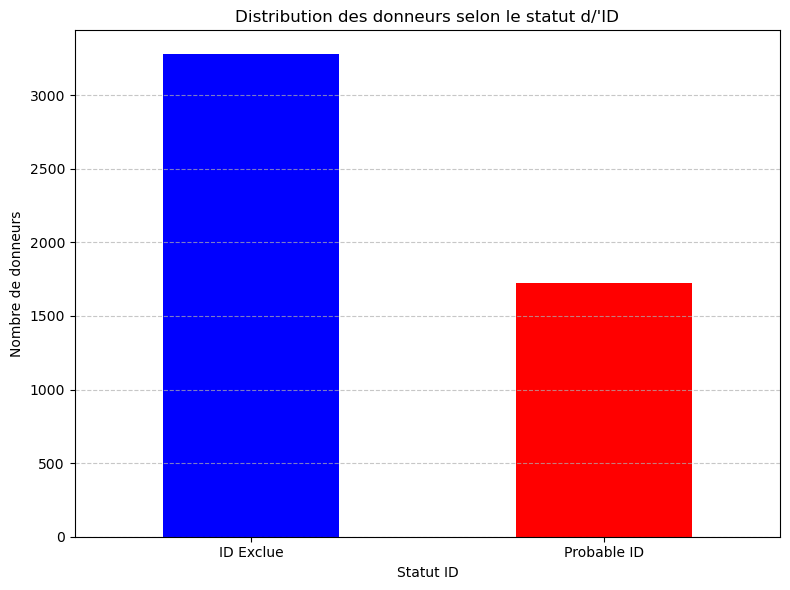

,Age,Sexe,Frequence_don,Hb,Ferritine,MCH,MCHC,MCV,Ret_Hb,RDW_CV,Statut_ID
0,56,F,unique,12.483831,31.936586,31.691112,32.320663,94.464986,33.672476,14.328071,ID Exclue
1,69,F,unique,11.755670,16.927405,24.508279,31.910794,73.380876,30.794794,15.541531,Probable ID
2,46,M,frequent,16.961889,270.402535,30.350982,32.724264,85.722548,32.673233,13.700888,ID Exclue
3,32,F,regulier,15.245893,14.312755,25.938387,31.115844,78.293838,33.453312,14.264862,Probable ID
4,60,F,frequent,14.412384,20.928288,25.795202,32.100952,78.039792,35.009314,12.830169,ID Exclue


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Taille de l'échantillon
n_donneurs = 5000

# Générer des données démographiques
np.random.seed(42)
ages = np.random.randint(18, 71, n_donneurs)
sexes = np.random.choice(['F', 'M'], size=n_donneurs, p=[0.55, 0.45])
freq_dons = np.random.choice(['unique', 'regulier', 'frequent'], size=n_donneurs, p=[0.3, 0.5, 0.2])

# Générer des paramètres biologiques
hb = np.where(sexes == 'M', np.random.normal(14.5, 1.2, n_donneurs), np.random.normal(13.2, 1.0, n_donneurs))
ferritine = np.where(sexes == 'M', np.random.normal(100, 50, n_donneurs), np.random.normal(30, 15, n_donneurs))
MCH = np.random.normal(28, 2, n_donneurs)
MCHC = np.random.normal(32, 1, n_donneurs)
MCV = np.random.normal(85, 5, n_donneurs)
Ret_Hb = np.random.normal(32, 2, n_donneurs)
RDW_CV = np.random.normal(14, 1, n_donneurs)

# Appliquer l'algorithme du logigramme
def detect_id(mch, mchc, mcv, ret_hb, rdw_cv):
    if mch > 26.95 and mchc > 31.95:
        return "ID Exclue"
    elif mcv > 83.55:
        if ret_hb > 31.85:
            return "ID Exclue"
        else:
            return "Probable ID" if rdw_cv > 13.25 else "ID Exclue"
    else:
        return "Probable ID" if rdw_cv > 13.25 else "ID Exclue"

statut_id = [detect_id(m, c, v, r, d) for m, c, v, r, d in zip(MCH, MCHC, MCV, Ret_Hb, RDW_CV)]

# Créer un DataFrame
data = pd.DataFrame({
    'Age': ages,
    'Sexe': sexes,
    'Frequence_don': freq_dons,
    'Hb': hb,
    'Ferritine': ferritine,
    'MCH': MCH,
    'MCHC': MCHC,
    'MCV': MCV,
    'Ret_Hb': Ret_Hb,
    'RDW_CV': RDW_CV,
    'Statut_ID': statut_id
})

# Graphique : Répartition des donneurs par statut ID
distribution_id = data['Statut_ID'].value_counts()

plt.figure(figsize=(8, 6))
distribution_id.plot(kind='bar', color=['blue', 'red'])
plt.title("Distribution des donneurs selon le statut d/'ID")
plt.ylabel('Nombre de donneurs')
plt.xlabel('Statut ID')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.tight_layout()
plt.show()

# Afficher les données complètes
data.head()
